In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [148]:
dataFile = r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\sel_cells_20_50_10_newctrl.csv'

In [149]:
myData = pd.read_csv(dataFile)

### Add useful transformations

In [150]:
# add physical time based on DHB length
myData['age_track'] = (myData.DHB_len - 1) *10 / 60

In [151]:
# add day of experiments (with 'd' because otherwise seaborn fails to recognize it as a category)
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [152]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,file,original cell name,Amy_mod,movie,x,y,...,random_10perc_ch2,hetChrom_10perc_ch3,random_10perc_ch3,exp_folder,hetChrom_newctl_volume,hetChrom_newctl_ch1,hetChrom_newctl_ch2,hetChrom_newctl_ch3,age_track,day
0,0,0,0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,956,...,131640512.0,1.352231e+09,1.043517e+09,20190625-MSL rename,280370,5.739116e+09,3.726297e+09,9.123801e+09,0.666667,d20190625
1,1,1,1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,...,128299406.0,1.353023e+09,1.065184e+09,20190625-MSL rename,250606,5.403750e+09,3.628343e+09,8.997863e+09,0.666667,d20190625
2,2,2,2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,...,148176740.0,1.366670e+09,1.118365e+09,20190625-MSL rename,189925,6.729417e+09,4.442309e+09,1.076495e+10,2.000000,d20190625
3,3,3,3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,...,139563277.0,1.298882e+09,1.038559e+09,20190625-MSL rename,220076,5.459073e+09,3.733122e+09,9.257708e+09,2.000000,d20190625
4,4,4,4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,...,183210463.0,2.583220e+09,2.158853e+09,20190625-MSL rename,436430,8.007695e+09,4.024894e+09,1.674243e+10,19.500000,d20190625


In [154]:
indexNames = myData[ myData['hetChrom_newctl_volume'] == 0 ].index

In [155]:
myData=myData.drop(indexNames)

In [156]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [192]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [158]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [159]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

# plots for deconvolved

## original

<IPython.core.display.Javascript object>


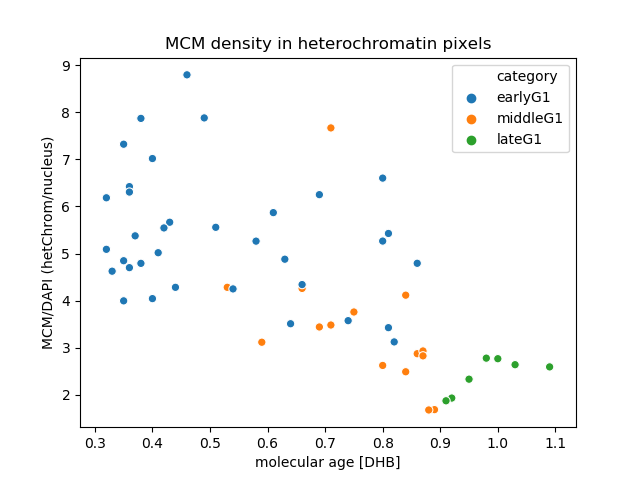

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [160]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


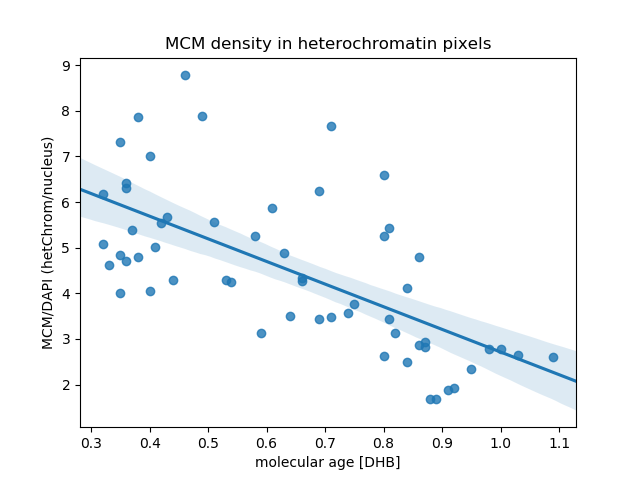

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [161]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [163]:
x = np.array(myDataSel.molecularAge_ratio)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [164]:
myTrendData=myTrendData.append(pd.Series(['original', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## Modification

### modification = 0.3

In [166]:
mod=0.3

In [167]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


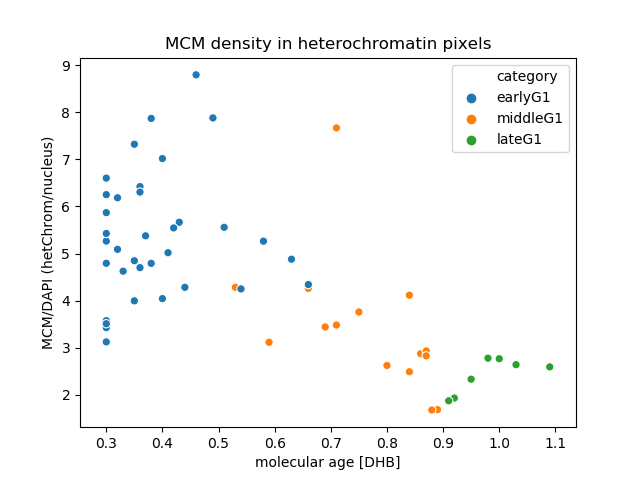

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [168]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


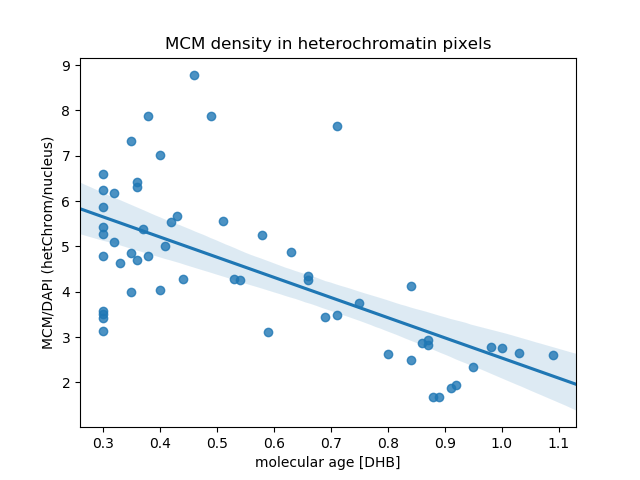

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [169]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [170]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [171]:
myTrendData=myTrendData.append(pd.Series(['0.3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0

In [172]:
mod=0

In [173]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


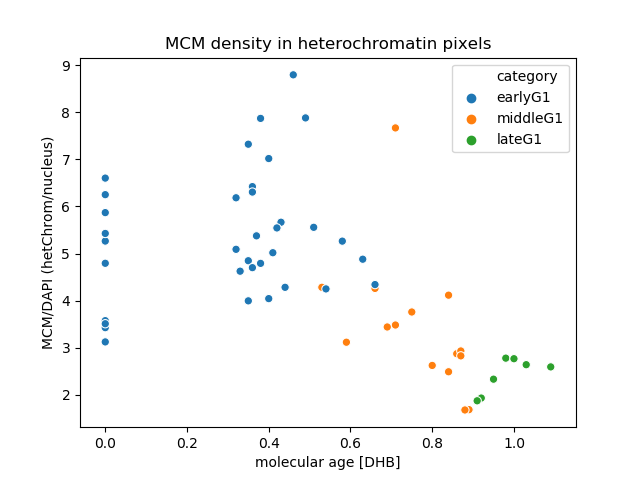

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [174]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


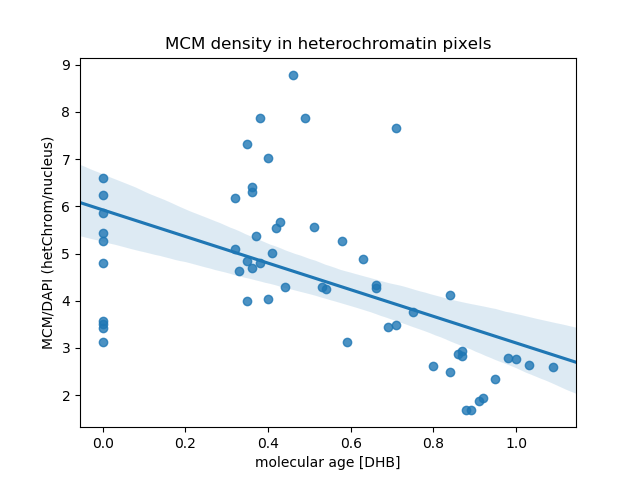

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [175]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [176]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [177]:
myTrendData=myTrendData.append(pd.Series(['0', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5

In [178]:
mod=0.5

In [179]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


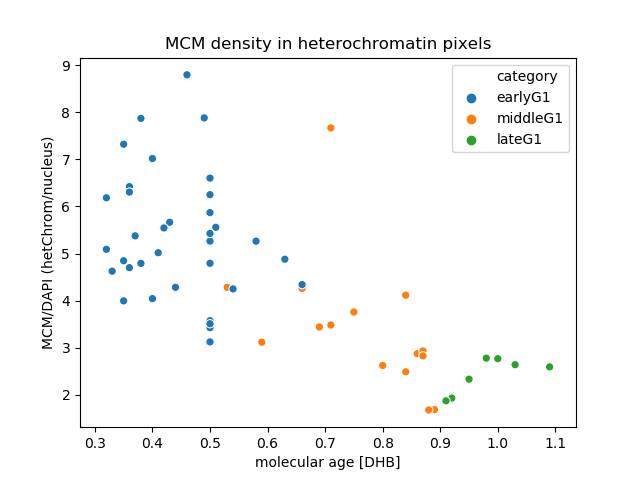

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [180]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


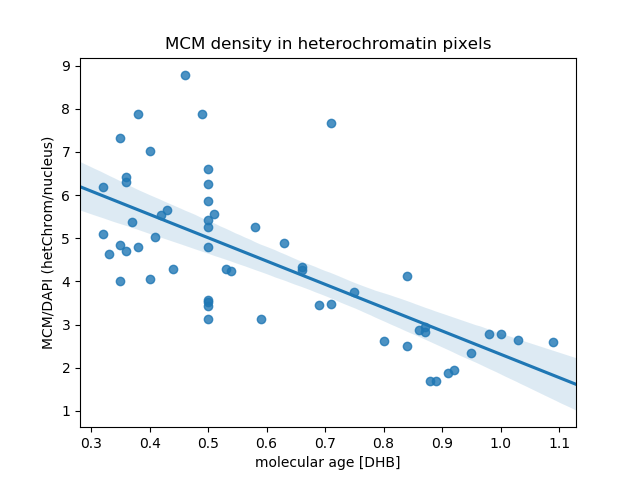

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [181]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [182]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [183]:
myTrendData=myTrendData.append(pd.Series(['0.5', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy modification

In [224]:
myDataSel['mol_age_mod']=myDataSel.molecularAge_ratio
myDataSel_mol_age_change=myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']

In [225]:
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=-1*myDataSel['mol_age_mod']+np.max(myDataSel_mol_age_change)

<IPython.core.display.Javascript object>


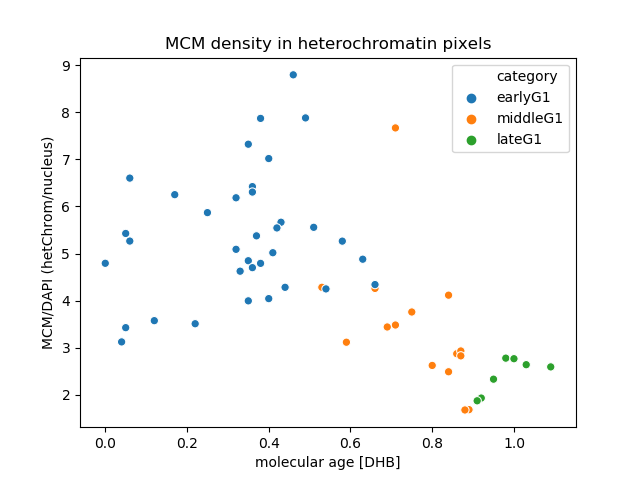

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [226]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


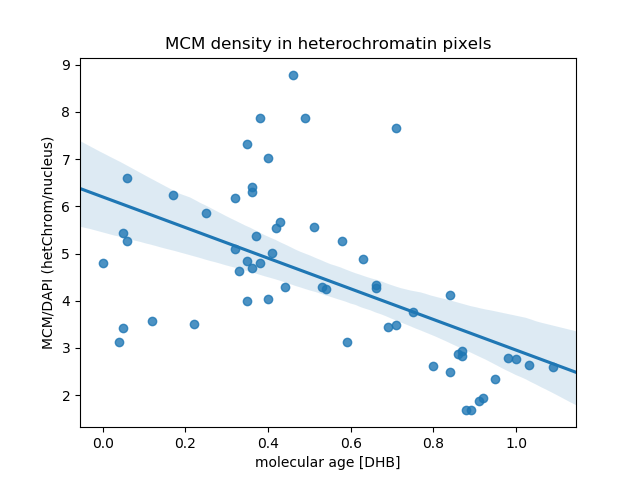

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [227]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_newctl_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_newctl_ch3/myDataSel.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [228]:
x = np.array(myDataSel.mol_age_mod)
y = np.array(myDataSel.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [229]:
myTrendData=myTrendData.append(pd.Series(['amy_mod', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2, False], index=myTrendData.columns),ignore_index=True)

# plots for not deconvolved

## original

<IPython.core.display.Javascript object>


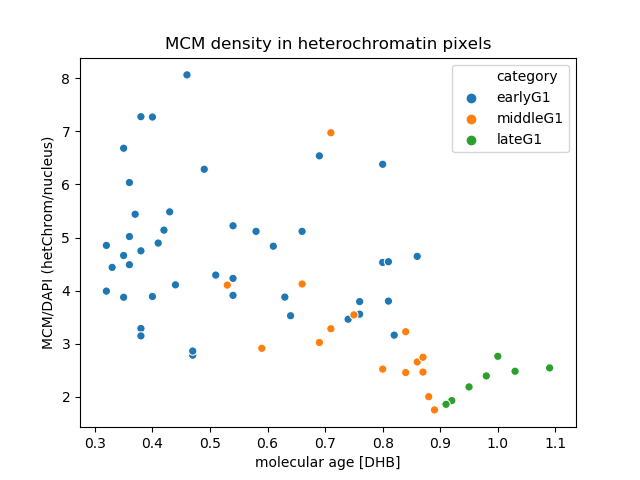

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [184]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


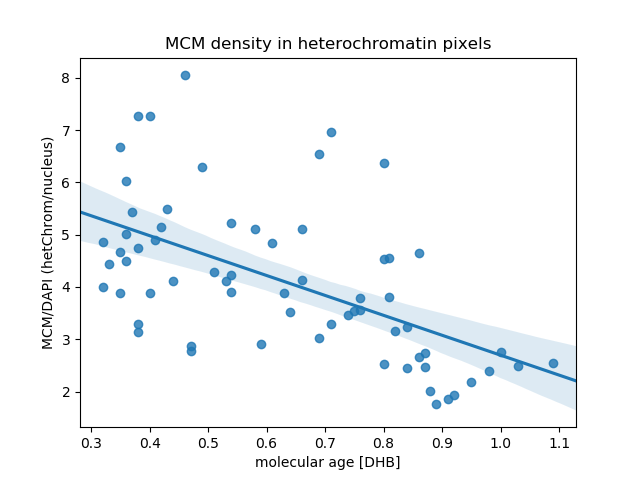

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [185]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='molecularAge_ratio', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [193]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [194]:
myTrendDatand=myTrendDatand.append(pd.Series(['original', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

## modification

### modification = 0.3

In [195]:
mod=0.3

In [196]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


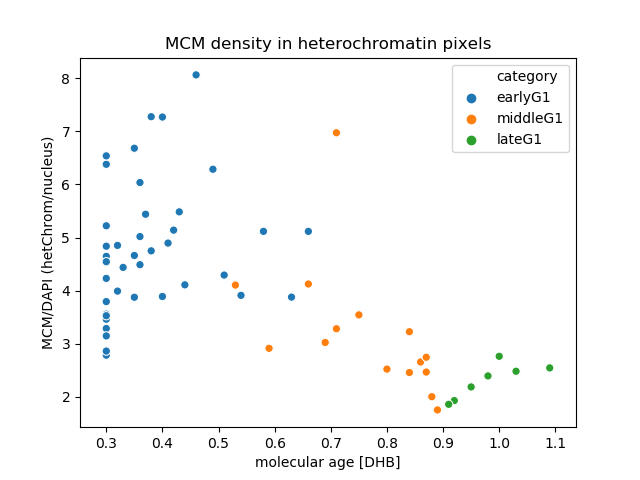

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [197]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


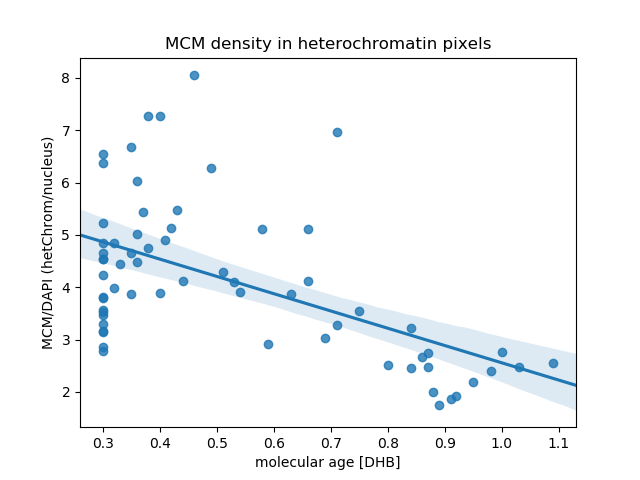

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [198]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [199]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [200]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.3', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0

In [201]:
mod=0

In [202]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


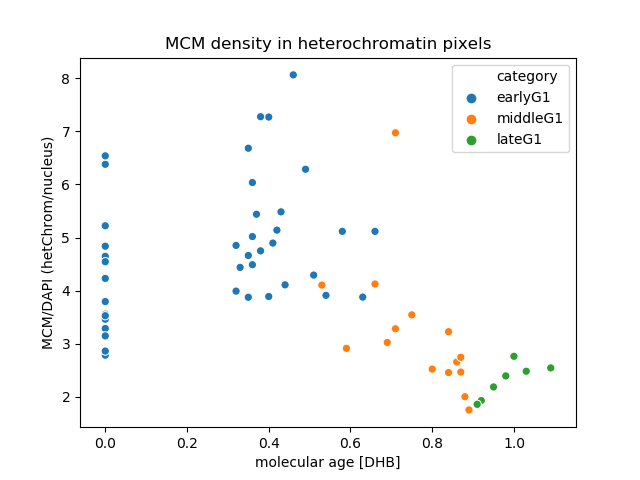

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [203]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


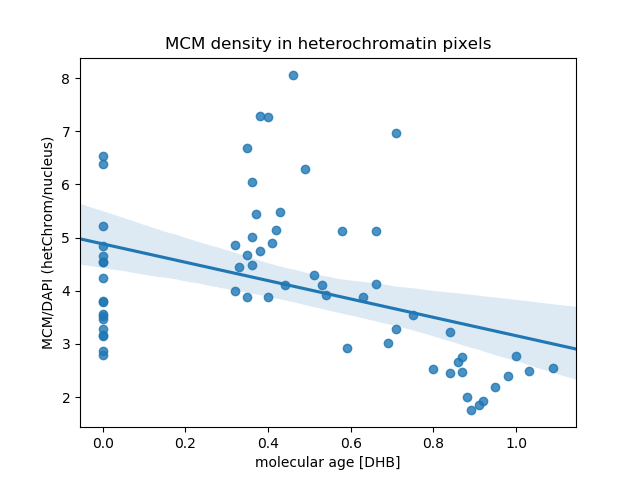

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [204]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [205]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [206]:
myTrendDatand=myTrendDatand.append(pd.Series(['0', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### modification = 0.5

In [207]:
mod=0.5

In [208]:
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=mod

<IPython.core.display.Javascript object>


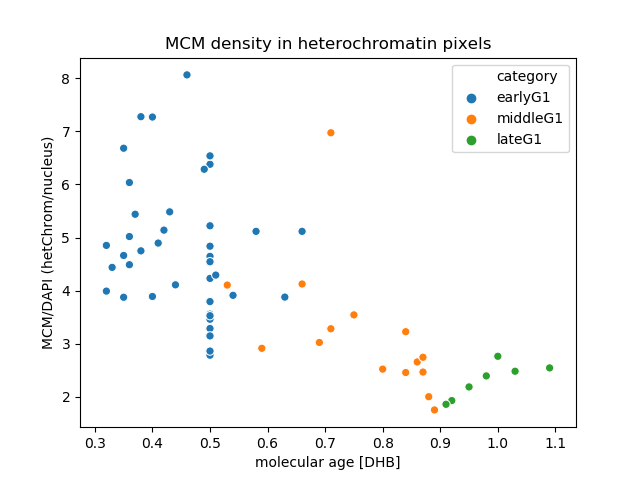

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [209]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


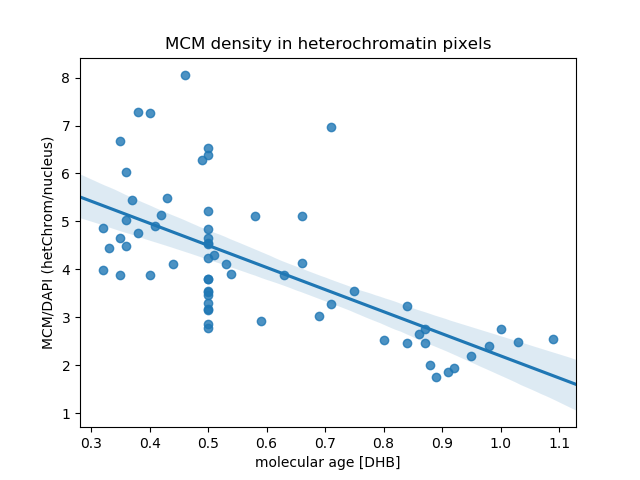

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [210]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [211]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [212]:
myTrendDatand=myTrendDatand.append(pd.Series(['0.5', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2], index=myTrendData.columns),ignore_index=True)

### amy modification

In [218]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()
myDataSelnd['mol_age_mod']=myDataSelnd.molecularAge_ratio
myDataSelnd_mol_age_change=myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']
myDataSelnd.loc[((myDataSelnd.age_track<1.5) & (myDataSelnd.category=='earlyG1')),'mol_age_mod']=-1*myDataSelnd['mol_age_mod']+np.max(myDataSelnd_mol_age_change)

<IPython.core.display.Javascript object>


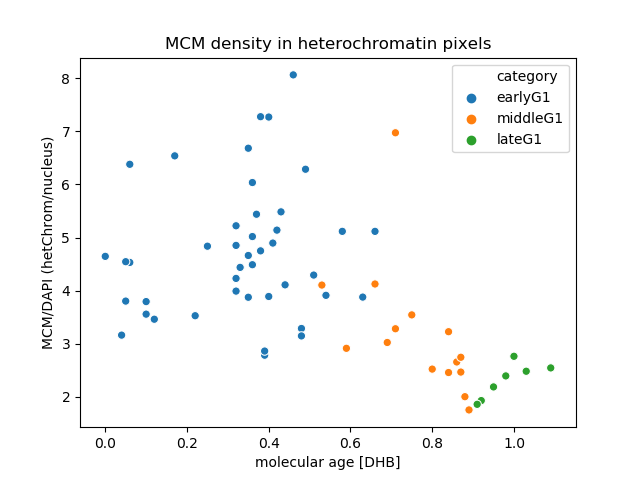

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [219]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:],hue='category')
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


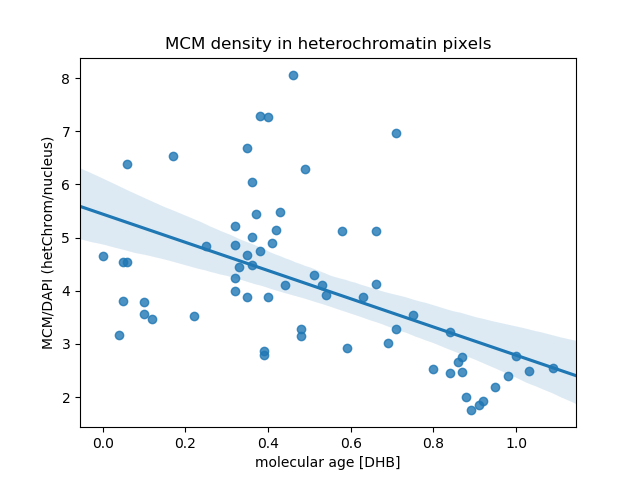

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [220]:
%matplotlib notebook

myDataSelnd['temp']=(myDataSelnd.hetChrom_newctl_ch2/myDataSelnd.nucleus_Otsu_ch2)/(myDataSelnd.hetChrom_newctl_ch3/myDataSelnd.nucleus_Otsu_ch3)
sn.regplot(x='mol_age_mod', y = 'temp', data=myDataSelnd.loc[((myDataSelnd.day!='d20190625') & (myDataSelnd.day!='d201907012') &
                                                           ['G1' in x for x in myDataSelnd.category]),:])
plt.ylabel("MCM/DAPI (hetChrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

In [221]:
x = np.array(myDataSelnd.molecularAge_ratio)
y = np.array(myDataSelnd.temp)
#mask = ~np.isnan(x) & ~np.isnan(y)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
originalregress=stats.linregress(x, y)

In [223]:
myTrendDatand=myTrendDatand.append(pd.Series(['amy_mod', originalregress.slope,originalregress.intercept,originalregress.rvalue,originalregress.pvalue,originalregress.stderr, originalregress.rvalue**2,False], index=myTrendData.columns),ignore_index=True)

# review

In [230]:
myTrendData['pvalue significance']=True
for i, mod in myTrendData.iterrows():
    if myTrendData.at[i,'pvalue']>0.05:
        myTrendData.at[i,'pvalue significance']=False

In [231]:
myTrendDatand['pvalue significance']=True
for i, mod in myTrendDatand.iterrows():
    if myTrendDatand.at[i,'pvalue']>0.05:
        myTrendDatand.at[i,'pvalue significance']=False

In [232]:
myTrendData=myTrendData.sort_index(by='rsquared',ascending=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [233]:
myTrendData

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
4,amy_mod,-0.507444,4.718953,-0.087903,0.348085,0.538577,0.007727,False
0,0.5,-0.680294,4.865039,-0.103214,0.270219,0.614016,0.010653,False
1,0.3,-0.798541,4.931666,-0.128939,0.167759,0.575203,0.016625,False
2,original,-0.872009,5.024835,-0.131080,0.160751,0.617686,0.017182,False
3,0,-0.843617,4.932779,-0.155219,0.096161,0.502865,0.024093,False


In [234]:
myTrendDatand

,trendName,slope,intercept,rvalue,pvalue,stderr,rsquared,pvalue significance
0,original,-0.336051,4.340524,-0.055213,0.540826,0.547959,0.003048,False
1,0.3,-0.336051,4.340524,-0.055213,0.540826,0.547959,0.003048,False
2,0,-0.336051,4.340524,-0.055213,0.540826,0.547959,0.003048,False
3,0.5,-0.336051,4.340524,-0.055213,0.540826,0.547959,0.003048,False
4,amy_mod,-0.336051,4.340524,-0.055213,0.540826,0.547959,0.003048,False
